# 메트로폴리스 알고리즘을 이용한 2차원 스핀계의 에너지

메트로폴리스 알고리즘 구현:

	• 초기 상태에서 시작하여, 반복적으로 새로운 상태를 제안하고 수용할지 여부를 결정한다.
	• 각 반복에서 랜덤하게 하나의 스핀을 뒤집어 제안된 새 상태를 생성한다.
	• 수용 비율을 계산하여 제안된 상태를 현재 상태로 수용하거나 거부한다.
	• beta 매개변수는 역온도를 나타내며, 높은 값일수록 높은 에너지 상태를 더 자주 수용한다.
	• 시뮬레이션 과정에서 에너지와 자기순서를 기록하여 시스템의 상태 변화를 추적한다.

메트로폴리스 알고리즘과 beta

	• 메트로폴리스 알고리즘은 마르코프 체인 몬테카를로방법의 일종, 제안 분포와 목표 분포의 비율을 기반으로 샘플링을 수행한다. beta는 이러한 수용 비율을 조절하는 매개변수로, 역온도다.
	• beta가 높을수록 높은 에너지 상태를 더 자주 수용하게 되므로, 시스템이 더 많은 에너지 상태를 탐색할 수 있다.
	• beta가 낮을수록 현재 상태를 더 선호하게 되므로, 시스템이 저 에너지 상태에 수렴할 가능성이 더 커진다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#주기적 경계 조건
def neighbor(L,N) : #L : 행의 갯수, N : number
    neighbor_number = []
    neighbor_point = []

    x = N % L
    y = N // L

    if x == 0 :
        temp_x = x + L - 1
        temp_y = y
        neighbor_point.append([temp_x, temp_y])
    else :
        neighbor_point.append([x-1, y])

    if x == L-1 :
        temp_x = x - L + 1
        temp_y = y
        neighbor_point.append([temp_x, temp_y])
    else :
        neighbor_point.append([x+1, y])

    if y == 0 :
        temp_x = x
        temp_y = (L-1)
        neighbor_point.append([temp_x, temp_y])
    else :
        neighbor_point.append([x, y-1])

    if y == L-1 :
        temp_x = x
        temp_y = 0
        neighbor_point.append([temp_x, temp_y])
    else :
        neighbor_point.append([x, y+1])


    for point in neighbor_point:
        x, y = point
        neighbor_number.append(y * L + x)

    return neighbor_point

In [3]:
#에너지 함수
def energy(L, A) : #L : 행의 갯수, A: 행렬 이름
    E = 0
    for i in range(L ** 2) :
        target_x = i % L
        target_y = i // L

        for i in neighbor(L, i) :
            if A[target_x][target_y] == A[i[0]][i[1]] :
                E -= 1
            else :
                E += 1
    E = E/2  # double count 문제 해결하기 위해 "/2"함
    return E

In [6]:
L = 5
A = np.random.randint(0,2 , (L, L)) * 2 - 1

# a = np.zeros([5,5])
A[0][0] = +1
A

array([[ 1,  1, -1, -1,  1],
       [ 1,  1,  1, -1, -1],
       [ 1,  1, -1,  1, -1],
       [-1,  1,  1,  1,  1],
       [-1,  1, -1,  1, -1]])

In [7]:
S = np.random.randint(0,2 , (L, L)) * 2 - 1

S[0][0] = +1
print(S)
E_S = energy(5, S)
print(E_S)

[[ 1 -1  1 -1 -1]
 [-1 -1 -1  1 -1]
 [-1 -1 -1  1  1]
 [-1 -1  1  1 -1]
 [ 1  1 -1  1 -1]]
2.0


In [8]:
U = S.copy()
random_row = np.random.randint(0, L)
random_col = np.random.randint(0, L)
print(random_row, random_col)
U[random_row][random_col] = S[random_row][random_col] * -1

print(U)
E_U = energy(5, U)
print(E_U)

3 2
[[ 1 -1  1 -1 -1]
 [-1 -1 -1  1 -1]
 [-1 -1 -1  1  1]
 [-1 -1 -1  1 -1]
 [ 1  1 -1  1 -1]]
-2.0


In [9]:
beta = 1
if E_S > E_U :
    accept_SU = 1
else :
    accept_SU = np.exp(beta * (E_S - E_U))
if np.random.random() < accept_SU :
    S = U
print("E : {}, m : {}".format(energy(L, S), np.sum(S)/(L**2)))

E : -2.0, m : -0.28


# beta = 0 vs beta = 10

In [10]:
beta = 10
n = 1000

S = np.random.randint(0,2 , (L, L)) * 2 - 1
S[0][0] = +1
E_S = energy(5, S)
m = np.sum(S)/len(S)
E_list, m_list = [E_S], [m]

for i in range(n) :
    U = S.copy()
    random_row = np.random.randint(0, L)
    random_col = np.random.randint(0, L)
    U[random_row][random_col] = S[random_row][random_col] * -1

    E_U = energy(5, U)

    if E_S > E_U :
        accept_SU = 1
    else :
        accept_SU = np.exp(beta * (E_S - E_U))
    if np.random.random() < accept_SU :
        S = U

    E_S = energy(5,S)
    m = np.sum(S)/(L**2)
    E_list.append(E_S)
    m_list.append(m)

print('E_list', E_list)
print('m_list', m_list)

E_list [10.0, 10.0, 10.0, 6.0, 6.0, 6.0, 6.0, 2.0, 2.0, -2.0, -6.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -14.0, -14.0, -14.0, -18.0, -18.0, -18.0, -18.0, -18.0, -18.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -38.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -

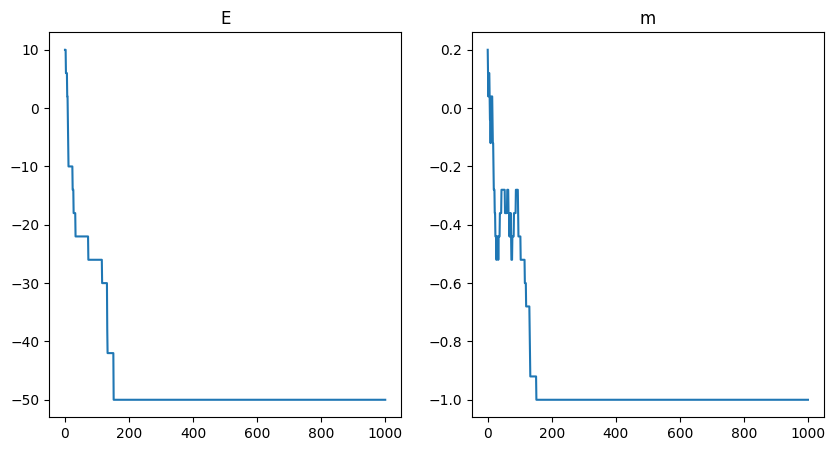

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 subplot에 그리기
plt.plot(E_list)
plt.title("E")

plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 subplot에 그리기
plt.plot(m_list)
plt.title("m")

plt.show()

In [14]:
beta = 0
n = 1000

S = np.random.randint(0,2 , (L, L)) * 2 - 1
S[0][0] = +1
E_S = energy(5, S)
m = np.sum(S)/len(S)
E_list, m_list = [E_S], [m]

for i in range(n) :
    U = S.copy()
    random_row = np.random.randint(0, L)
    random_col = np.random.randint(0, L)
    U[random_row][random_col] = S[random_row][random_col] * -1

    E_U = energy(5, U)

    if E_S > E_U :
        accept_SU = 1
    else :
        accept_SU = np.exp(beta * (E_S - E_U))
    if np.random.random() < accept_SU :
        S = U

    E_S = energy(5,S)
    m = np.sum(S)/(L**2)
    E_list.append(E_S)
    m_list.append(m)

print('E_list', E_list)
print('m_list', m_list)

E_list [-6.0, 2.0, 2.0, 2.0, 6.0, 2.0, -2.0, -2.0, -6.0, -14.0, -14.0, -14.0, -10.0, -2.0, -6.0, -2.0, -2.0, -6.0, -2.0, -6.0, -14.0, -18.0, -18.0, -14.0, -10.0, -10.0, -10.0, -6.0, -10.0, -10.0, -14.0, -10.0, -10.0, -10.0, -10.0, -6.0, -2.0, -2.0, -6.0, -2.0, -2.0, 2.0, -2.0, -2.0, -2.0, -6.0, -10.0, -10.0, -14.0, -10.0, -10.0, -2.0, 2.0, 2.0, -6.0, -2.0, -6.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -2.0, -10.0, -10.0, -6.0, -2.0, -2.0, -2.0, -6.0, -14.0, -14.0, -6.0, 2.0, -6.0, 2.0, -2.0, 2.0, 2.0, 6.0, 2.0, -2.0, 2.0, -2.0, -2.0, -2.0, -2.0, -6.0, -2.0, -2.0, -6.0, -6.0, -6.0, 2.0, -2.0, -6.0, -2.0, -2.0, -6.0, -2.0, 2.0, -2.0, -6.0, -2.0, -2.0, -2.0, -6.0, -2.0, 6.0, 6.0, 2.0, 6.0, 2.0, 6.0, 10.0, 14.0, 10.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 2.0, -2.0, -2.0, -2.0, -2.0, -6.0, -2.0, -2.0, -2.0, 2.0, -2.0, -6.0, -6.0, -10.0, -10.0, -14.0, -14.0, -10.0, -6.0, -6.0, -10.0, -6.0, -6.0, -10.0, -2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -6.0, -2.0, 2.0, -2.0, -2.0, 

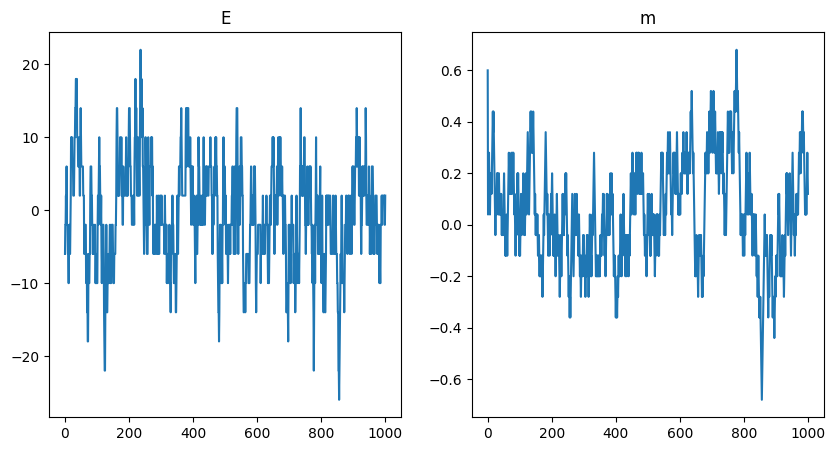

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 subplot에 그리기
plt.plot(E_list)
plt.title("E")

plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 subplot에 그리기
plt.plot(m_list)
plt.title("m")

plt.show()